# 2021-22 Premier League - Recap

Hello! My name is Francisco Mesquita and welcome to the first Data Analysis project in Football. First of all, I would like to thank you for taking a look on my work, and I would like to thank FC Python (https://fcpython.com/) for sharing, free of charge, their work, which inspired this project in its entirety.

In this notebook, I'll give a quick recap of the 2021–22 Premier League. Here, using the features of matplotlib and pandas, you'll see which teams underperfomed, overperformed or performed just right in terms of total points, goals scored, goals allowed, goals difference, points and final positions in the table, compared with the data provided by https://understat.com/, such as, expected goals (xG), expected goals allowed (xGA), expected points and, consequently, expected positions (xPos), and also compared to the 2020-21 Premier League.

## 1. Important definitions

Before starting coding, if you are not familiar with some football terminologies, I'll give a short list of definitions:

- Expected Goals (xG) - The volume of goals that either a player or team will be expected to score based on the factors that a model takes into consideration. In this case, it's the amount of goals that a team is expected to have scored based on the expected goals data.
- Expected Goals Allowed (xGA) - The number of goals a team should have conceded based on the expected goals data.
- Expected Goal Difference (xGD) - the difference of goals a team scores and goals a team concedes based on the expected goals data.
- Expected Points (xPts) - The number of points a team is expected to have won in correlation with the expected goals data.
- Expected Position (xPos) - The position a team is expected to be placed in correlation with the the expected goals data.

Source: https://www.thepunterspage.com/expected-goals-explained/

## 2. Import modules

Firstly, the most important thing when working with Python is to import the modules you need:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#This next line makes our charts show up in the notebook
%matplotlib inline

# I want that my dataframes show all the columns
pd.options.display.max_columns = None

## 3. Import the dataset

Secondly, when you wish to analyse some data, it's important either to create your DataFrame or to import a dataset from an exterior source. The data used was adapted from the one that can be found in this link https://understat.com/league/EPL.

In [2]:
table = pd.read_csv("2122table.csv")
table

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts,xG,xGA,xPts,xPos
0,1,Manchester City,38,29,6,3,99,26,73,93,93.40,25.21,91.88,1
1,2,Liverpool,38,28,8,2,94,26,68,92,93.02,32.73,86.56,2
2,3,Chelsea,38,21,11,6,76,33,43,74,69.30,35.12,73.38,3
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,67.95,43.70,66.09,4
4,5,Arsenal,38,22,3,13,61,48,13,69,63.39,48.39,64.76,5
5,6,Manchester United,38,16,10,12,57,57,0,58,57.21,56.85,54.52,8
6,7,West Ham United,38,16,8,14,60,51,9,56,54.98,54.88,53.56,10
7,8,Leicester City,38,14,10,14,62,59,3,52,49.49,66.11,42.31,15
8,9,Brighton,38,12,15,11,42,44,-2,51,49.57,47.21,54.18,9
9,10,Wolves,38,15,6,17,38,43,-5,51,39.04,58.48,40.54,17


That's an interesting and complete table! But I think we can do it better.

Let's check if the metrics were accurate - to do that, we can create new columns to our dataframe, the columns related to the difference between the real value and the expected value:

In [3]:
table['DiffGF'] = table['GF'] - table['xG']
table['DiffGA'] = table['GA'] - table['xGA']
table['DiffGD'] = table['GD'] - (table['xG'] - table['xGA'])
table['DiffPts'] = table['Pts'] - table['xPts']
table['DiffPos'] = table['xPos'] - table['Pos']

Now that we have all the data we want, we want to organize our columns in a way it's easy to read:

In [4]:
table22 = table[['Pos', 'Team', 'PLD', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'DiffGF',
       'xGA', 'DiffGA', 'DiffGD', 'xPts', 'DiffPts', 'xPos', 'DiffPos']]
table22

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts,xG,DiffGF,xGA,DiffGA,DiffGD,xPts,DiffPts,xPos,DiffPos
0,1,Manchester City,38,29,6,3,99,26,73,93,93.40,5.60,25.21,0.79,4.81,91.88,1.12,1,0
1,2,Liverpool,38,28,8,2,94,26,68,92,93.02,0.98,32.73,-6.73,7.71,86.56,5.44,2,0
2,3,Chelsea,38,21,11,6,76,33,43,74,69.30,6.70,35.12,-2.12,8.82,73.38,0.62,3,0
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,67.95,1.05,43.70,-3.70,4.75,66.09,4.91,4,0
4,5,Arsenal,38,22,3,13,61,48,13,69,63.39,-2.39,48.39,-0.39,-2.00,64.76,4.24,5,0
5,6,Manchester United,38,16,10,12,57,57,0,58,57.21,-0.21,56.85,0.15,-0.36,54.52,3.48,8,2
6,7,West Ham United,38,16,8,14,60,51,9,56,54.98,5.02,54.88,-3.88,8.90,53.56,2.44,10,3
7,8,Leicester City,38,14,10,14,62,59,3,52,49.49,12.51,66.11,-7.11,19.62,42.31,9.69,15,7
8,9,Brighton,38,12,15,11,42,44,-2,51,49.57,-7.57,47.21,-3.21,-4.36,54.18,-3.18,9,0
9,10,Wolves,38,15,6,17,38,43,-5,51,39.04,-1.04,58.48,-15.48,14.44,40.54,10.46,17,7


Great, we have a complete dataframe which allows to compare the real values to predictions!

## 4. Export the data

Imagine that you want to save this dataframe, how do you export the data? There are two popular options:

- exporting the data to a CSV file,
- exporting the data to an Excel file.

On one hand, if you want to analyze this data as a CSV file, there's an easy function that allows us to do that, to_csv:

In [5]:
table22.to_csv('Complete_2122Table.csv')

On the other hand, if you want to analyze this data as an Excel file, there's an easy function that allows us to do that, to_excel:

In [6]:
table22.to_excel('Complete_2122Table.xlsx')

## 5. 21/22 Premier League Analysis - Which team underperfomed, overperformed or performed as expected, acccording to the expected goal data?

Now we turn our attention to the main goal of this study - analyzing the 21/22 Premier League, specifically the performance of each team against predictive metrics.

First, let's create a bar chart to investigate the final table in terms of points of each team:

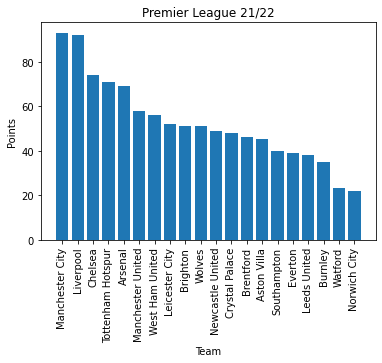

In [7]:
#Create our bar chart
plt.bar(x = np.arange(1, 21), height = table22['Pts'])

#Give it a title
plt.title("Premier League 21/22")

#Give the x axis some labels across the tick marks.
#Argument one is the position for each label
#Argument two is the label values and the final one is to rotate our labels
plt.xticks(np.arange(1, 21), table22['Team'], rotation=90)

# Label each axis
plt.xlabel("Team")
plt.ylabel("Points")

# Let's show our plot
plt.show()

Great! We've created a chart that easily represents the 21/22 Premier League table! However, it's still a bit monochromatic and boring... Let's change that!

First, we'll create an array with the respective teams color, using hex codes, in order of our chart, in order of the final standings:

In [8]:
#Each value is the hex code for the team's colours, in order of our chart
teamColours = ['#84BBFF','#D10022','#034694','#001C58',
              '#EF0107','#DA020E','#660033','#0053A0',
               '#0022FF','#FF8400','#000000','#1B458F',
               '#f50f33', '#670E36','#ED1A3B','#274488',
               '#FFD700','#00418E','#FBEE23', '#FFFF00']

These hex codes can be found on-line, either searching on Google, or, fastly, exploring on https://teamcolours.netlify.app/, which is a free platform where you can find the searchable RGB values of over 2,700 teams around the world!

As a result, we can plot our new bar chart as follows:

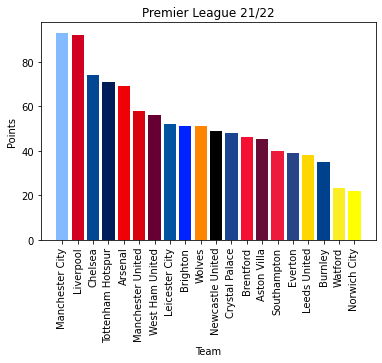

In [9]:
#Add a new argument, color, to our 'plt.bar()' method
#This argument passes our teamColours array
plt.bar(x = np.arange(1, 21), height = table22['Pts'], color = teamColours)

#Label bars, axes and the chart as before
plt.title("Premier League 21/22")
plt.xticks(np.arange(1, 21), table22['Team'], rotation=90)
plt.xlabel("Team")
plt.ylabel("Points")
plt.show()

Now that's what I call an upgrade!

Similarly, we can observe the same data through horizontal lines, using the function plt.hlines:

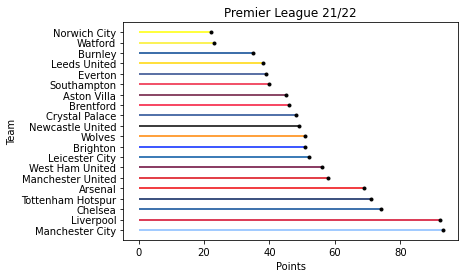

In [10]:
#Create an array of equal length to our bars

plt.hlines(y = np.arange(1,21), xmin = 0, xmax = table22['Pts'], color = teamColours)
plt.plot(table22['Pts'], np.arange(1,21), "k.") # the variable "k." means that we want to plot dark ("k") dots ("."-)
plt.yticks(np.arange(1,21), table22['Team'])

plt.ylabel("Team")
plt.xlabel("Points")

plt.title("Premier League 21/22")

plt.show()

Another great way to visualize our table!

Perpendicular to the function .hlines, there's the .vlines, which will be very useful to our next section on data visualization and analysis.

### 5.1 Comparison between Real Goals and Expected Goals



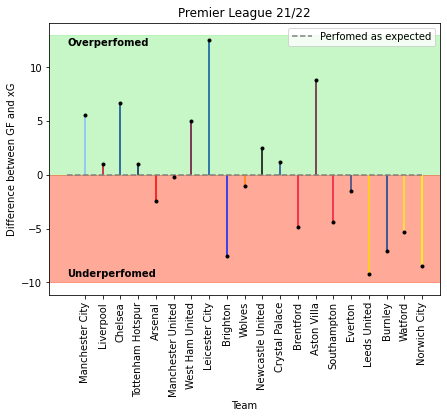

In [11]:
DiffGF = "difference between GF and xG"

# Create our plot

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

plt.vlines(x=np.arange(1, 21), ymin = 0, ymax = table22['DiffGF'], color = teamColours)
plt.plot(np.arange(1, 21), table22['DiffGF'], "k.")
plt.xticks(np.arange(1, 21), table22['Team'], rotation = 90)

# Label our axis and name our plot
plt.ylabel("Difference between GF and xG")
plt.xlabel("Team")
plt.title("Premier League 21/22")

# Setting the background color of the plot
ax.axhspan(0, 13, color = '#90EE90', alpha = 0.5) #Green
ax.axhspan(-10, 0, color = '#FF5733', alpha = 0.5) #Red

# Did your team underperfomed, overperfomed, or performed as expected?
ax.text(0, 12, "Overperfomed", color = "black", size = "10", weight = 'bold')
ax.text(0, -9.5, "Underperfomed", color = "black", size = "10", weight = 'bold')
plt.hlines(y = 0, xmin = 0, xmax = 20, color = '#808080', linestyles = 'dashed', label = 'Perfomed as expected')

# To show our label from the plt.hlines, we can't forget about:
plt.legend()
    
plt.show()

In [12]:
print(f'Which team overperformed in terms of {DiffGF}?')
table22[table22['DiffGF'] > 0][['Pos', 'Team','DiffGF']].sort_values("DiffGF", ascending = False)

Which team overperformed in terms of difference between GF and xG?


,Pos,Team,DiffGF
7,8,Leicester City,12.51
13,14,Aston Villa,8.87
2,3,Chelsea,6.70
0,1,Manchester City,5.60
6,7,West Ham United,5.02
10,11,Newcastle United,2.47
11,12,Crystal Palace,1.16
3,4,Tottenham Hotspur,1.05
1,2,Liverpool,0.98


In [13]:
print(f'Which team underperformed in terms of {DiffGF}?')
table22[table22['DiffGF'] < 0][['Pos', 'Team','DiffGF']].sort_values("DiffGF")

Which team underperformed in terms of difference between GF and xG?


,Pos,Team,DiffGF
16,17,Leeds United,-9.19
19,20,Norwich City,-8.51
8,9,Brighton,-7.57
17,18,Burnley,-7.11
18,19,Watford,-5.34
12,13,Brentford,-4.89
14,15,Southampton,-4.35
4,5,Arsenal,-2.39
15,16,Everton,-1.47
9,10,Wolves,-1.04


### 5.2 Comparison between Real Goals Allowed and Expected Goals Allowed

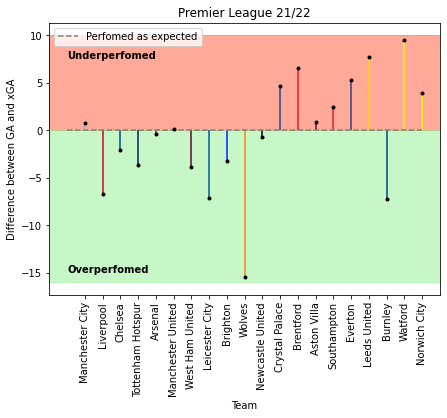

In [14]:
DiffGA = "difference between GA and xGA"

# Create our plot

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

plt.vlines(x = np.arange(1, 21), ymin = 0, ymax = table22['DiffGA'], color = teamColours)
plt.plot(np.arange(1, 21), table22['DiffGA'], "k.")
plt.xticks(np.arange(1, 21), table22['Team'], rotation=90)

# Label our axis and name our plot
plt.ylabel("Difference between GA and xGA")
plt.xlabel("Team")
plt.title("Premier League 21/22")

# Setting the background color of the plot 
ax.axhspan(0, 10, color = '#FF5733', alpha = 0.5) #Red
ax.axhspan(-16, 0, color = '#90EE90', alpha = 0.5) #Green

# Did your team underperfomed, overperfomed, or performed as expected?
ax.text(0, 7.5, "Underperfomed", color = "black", size = "10", weight = 'bold')
ax.text(0, -15, "Overperfomed", color = "black", size = "10", weight = 'bold')
plt.hlines(y = 0, xmin = 0, xmax = 20, color = '#808080', linestyles = 'dashed', label = 'Perfomed as expected')

# To show our label from the plt.hlines, we can't forget about:
plt.legend()

plt.show()

In [15]:
print(f'Which team overperformed in terms of {DiffGA}?')
table22[table22['DiffGA'] < 0][['Pos', 'Team','DiffGA']].sort_values("DiffGA")

Which team overperformed in terms of difference between GA and xGA?


,Pos,Team,DiffGA
9,10,Wolves,-15.48
17,18,Burnley,-7.22
7,8,Leicester City,-7.11
1,2,Liverpool,-6.73
6,7,West Ham United,-3.88
3,4,Tottenham Hotspur,-3.70
8,9,Brighton,-3.21
2,3,Chelsea,-2.12
10,11,Newcastle United,-0.71
4,5,Arsenal,-0.39


In [16]:
print(f'Which team underperformed in terms of {DiffGA}?')
table22[table22['DiffGA'] > 0][['Pos', 'Team','DiffGA']].sort_values("DiffGA", ascending = False)

Which team underperformed in terms of difference between GA and xGA?


,Pos,Team,DiffGA
18,19,Watford,9.47
16,17,Leeds United,7.69
12,13,Brentford,6.50
15,16,Everton,5.31
11,12,Crystal Palace,4.67
19,20,Norwich City,3.92
14,15,Southampton,2.44
13,14,Aston Villa,0.90
0,1,Manchester City,0.79
5,6,Manchester United,0.15


### 5.3 Comparison between Real Goal Difference and Expected Goal Difference

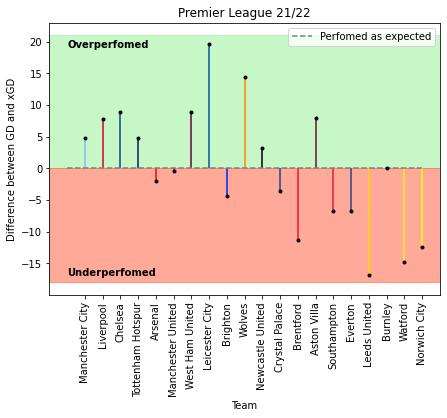

In [17]:
DiffGD = "difference between GD and xGD"

# Create our plot

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

plt.vlines(x = np.arange(1, 21), ymin = 0, ymax = table22['DiffGD'], color = teamColours)
plt.plot(np.arange(1, 21), table22['DiffGD'], "k.")
plt.xticks(np.arange(1, 21), table22['Team'], rotation=90)

# Label our axis and name our plot
plt.ylabel("Difference between GD and xGD")
plt.xlabel("Team")
plt.title("Premier League 21/22")

# Setting the background color of the plot 
ax.axhspan(0, 21, color = '#90EE90', alpha = 0.5) #Green
ax.axhspan(-18, 0, color = '#FF5733', alpha = 0.5) #Red

# Did your team underperfomed, overperfomed, or performed as expected?
ax.text(0, 19, "Overperfomed", color = "black", size = "10", weight = 'bold')
ax.text(0, -17, "Underperfomed", color = "black", size = "10", weight = 'bold')
plt.hlines(y = 0, xmin = 0, xmax = 20, color = '#808080', linestyles = 'dashed', label = 'Perfomed as expected')

# To show our label from the plt.hlines, we can't forget about:
plt.legend()

plt.show()

In [18]:
print(f'Which team overperformed in terms of {DiffGD}?')
table22[table22['DiffGD'] > 0][['Pos', 'Team','DiffGD']].sort_values("DiffGD", ascending = False)

Which team overperformed in terms of difference between GD and xGD?


,Pos,Team,DiffGD
7,8,Leicester City,19.62
9,10,Wolves,14.44
6,7,West Ham United,8.90
2,3,Chelsea,8.82
13,14,Aston Villa,7.97
1,2,Liverpool,7.71
0,1,Manchester City,4.81
3,4,Tottenham Hotspur,4.75
10,11,Newcastle United,3.18
17,18,Burnley,0.11


In [19]:
print(f'Which team underperformed in terms of {DiffGD}?')
table22[table22['DiffGD'] < 0][['Pos','Team','DiffGD']].sort_values("DiffGD")

Which team underperformed in terms of difference between GD and xGD?


,Pos,Team,DiffGD
16,17,Leeds United,-16.88
18,19,Watford,-14.81
19,20,Norwich City,-12.43
12,13,Brentford,-11.39
14,15,Southampton,-6.79
15,16,Everton,-6.78
8,9,Brighton,-4.36
11,12,Crystal Palace,-3.51
4,5,Arsenal,-2.00
5,6,Manchester United,-0.36


### 5.4 Comparison between Real Points and Expected Points

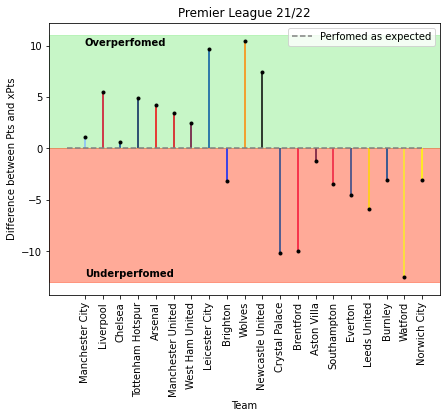

In [20]:
DiffPts = "Difference between Pts and xPts"

# Create our plot

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

plt.vlines(x = np.arange(1,21), ymin = 0, ymax = table22['DiffPts'], color = teamColours)
plt.plot(np.arange(1,21), table22['DiffPts'], "k.")
plt.xticks(np.arange(1,21), table22['Team'], rotation = 90)

# Label our axis and name our plot
plt.ylabel("Difference between Pts and xPts")
plt.xlabel("Team")
plt.title("Premier League 21/22")

# Setting the background color of the plot
ax.axhspan(0, 11, color = '#90EE90', alpha = 0.5)
ax.axhspan(-13, 0, color = '#FF5733', alpha = 0.5)

# Did your team underperfomed, overperfomed, or performed as expected?
ax.text(1, 10, "Overperfomed", color = "black", size = "10", weight = 'bold')
ax.text(1, -12.5, "Underperfomed", color = "black", size = "10", weight = 'bold')
plt.hlines(y = 0, xmin = 0,xmax = 20, color = '#808080', linestyles = 'dashed', label = 'Perfomed as expected')

# To show our label from the plt.hlines, we can't forget about:
plt.legend()

plt.show()

In [21]:
print(f'Which team overperformed in terms of {DiffPts}?')
table22[table22['DiffPts'] > 0][['Pos', 'Team','DiffPts']].sort_values("DiffPts", ascending = False)

Which team overperformed in terms of Difference between Pts and xPts?


,Pos,Team,DiffPts
9,10,Wolves,10.46
7,8,Leicester City,9.69
10,11,Newcastle United,7.47
1,2,Liverpool,5.44
3,4,Tottenham Hotspur,4.91
4,5,Arsenal,4.24
5,6,Manchester United,3.48
6,7,West Ham United,2.44
0,1,Manchester City,1.12
2,3,Chelsea,0.62


In [22]:
print(f'Which team underperformed in terms of {DiffPts}?')
table22[table22['DiffPts'] < 0][['Pos', 'Team','DiffPts']].sort_values("DiffPts")

Which team underperformed in terms of Difference between Pts and xPts?


,Pos,Team,DiffPts
18,19,Watford,-12.45
11,12,Crystal Palace,-10.15
12,13,Brentford,-10.00
16,17,Leeds United,-5.86
15,16,Everton,-4.54
14,15,Southampton,-3.45
8,9,Brighton,-3.18
17,18,Burnley,-3.10
19,20,Norwich City,-3.04
13,14,Aston Villa,-1.20


### 5.5 Comparison between Final Position and Expected Position

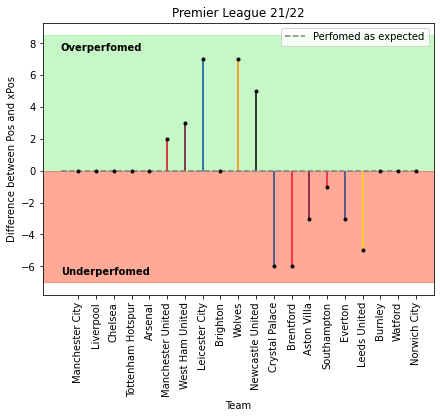

In [23]:
DiffPos = "difference between Pos and xPos"

# Create our plot

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

plt.vlines(x = np.arange(1, 21), ymin = 0, ymax = table22['DiffPos'], color = teamColours)
plt.plot(np.arange(1, 21), table22['DiffPos'], "k.")
plt.xticks(np.arange(1, 21), table22['Team'], rotation = 90)

# Label our axis and name our plot
plt.ylabel("Difference between Pos and xPos")
plt.xlabel("Team")
plt.title("Premier League 21/22")

# Setting the background color of the plot
ax.axhspan(0, 8.5, color = '#90EE90', alpha = 0.5)
ax.axhspan(-7, 0, color = '#FF5733', alpha = 0.5)

# Did your team underperfomed, overperfomed, or performed as expected?
ax.text(0, 7.5, "Overperfomed", color = "black", size = "10", weight = 'bold')
ax.text(0, -6.5, "Underperfomed", color = "black", size = "10", weight = 'bold')
plt.hlines(y = 0, xmin = 0, xmax = 20, color = '#808080', linestyles = 'dashed', label = 'Perfomed as expected')

# To show our label from the plt.hlines, we can't forget about:
plt.legend()

plt.show()

In [24]:
print(f'Which team overperformed in terms of {DiffPos}?')
table22[table22['DiffPos'] > 0][['Pos', 'Team','DiffPos']].sort_values("DiffPos", ascending = False)

Which team overperformed in terms of difference between Pos and xPos?


,Pos,Team,DiffPos
7,8,Leicester City,7
9,10,Wolves,7
10,11,Newcastle United,5
6,7,West Ham United,3
5,6,Manchester United,2


In [25]:
print(f'Which team performed as expected in terms of {DiffPos}?')
table22[table22['DiffPos'] == 0][['Pos', 'Team','DiffPos']]

Which team performed as expected in terms of difference between Pos and xPos?


,Pos,Team,DiffPos
0,1,Manchester City,0
1,2,Liverpool,0
2,3,Chelsea,0
3,4,Tottenham Hotspur,0
4,5,Arsenal,0
8,9,Brighton,0
17,18,Burnley,0
18,19,Watford,0
19,20,Norwich City,0


In [26]:
print(f'Which team underperformed in terms of {DiffPos}?')
table22[table22['DiffPos'] < 0][['Pos', 'Team','DiffPos']].sort_values("DiffPos")

Which team underperformed in terms of difference between Pos and xPos?


,Pos,Team,DiffPos
11,12,Crystal Palace,-6
12,13,Brentford,-6
16,17,Leeds United,-5
13,14,Aston Villa,-3
15,16,Everton,-3
14,15,Southampton,-1


### 5.6 Summary

Before summarizing this section, let's print a table with all the differences between the real values and the expected values according to expected goal data, sorted by the difference of points and differences of position.

In [27]:
table22[['Pos', 'Team', 'DiffGF', 'DiffGA', 'DiffGD', 'DiffPts', 'DiffPos']
       ].sort_values(['DiffPts', 'DiffPos'], ascending = False)

,Pos,Team,DiffGF,DiffGA,DiffGD,DiffPts,DiffPos
9,10,Wolves,-1.04,-15.48,14.44,10.46,7
7,8,Leicester City,12.51,-7.11,19.62,9.69,7
10,11,Newcastle United,2.47,-0.71,3.18,7.47,5
1,2,Liverpool,0.98,-6.73,7.71,5.44,0
3,4,Tottenham Hotspur,1.05,-3.70,4.75,4.91,0
4,5,Arsenal,-2.39,-0.39,-2.00,4.24,0
5,6,Manchester United,-0.21,0.15,-0.36,3.48,2
6,7,West Ham United,5.02,-3.88,8.90,2.44,3
0,1,Manchester City,5.60,0.79,4.81,1.12,0
2,3,Chelsea,6.70,-2.12,8.82,0.62,0


There are several conclusions that we can take from these results:

#### The Positives:
- Wolves were really under-appreciated before the 21/22 Premier League. They easily surpassed almost every prediction made (except Goals Scored). I guess that no one really believed that Bruno Lage and the boys (specially José Sá) could make an impact in the league).
- Newcastle United also outperfomed the predictions. Maybe the expected goal data was not expecting an Arabi Financial takeover.
- Leicester City is also a team that overperfomed the predictions. However, I believe that the expected goal data metrics exaggerated with the prognosis, foreseeing an awfull season for the 16/17 league champions.

#### The Negatives:
- Even though Watford was expected to be relegated, the metrics didn't expect them to have such a subpar season, being one of the most underwhelming teams of the season.
- Overall, Crystal Palace had a solid first season behind the management of Patrick Vieira. Nevertheless, the metrics were really behind The Eagles, predicting that they would finish 6th, even in front of Manchester United (I've learned that these metrics don't really like Man Utd). They finished 6 positions behind, at 12th.
- Another team that had a solid season was Brentford. Actually, The Bees were promoted to the highest level during the 20/21 season from the Championship, something that didn't happen since the 1946–47 season. Still, this team, famous for their "Moneyball" approach, was expected to be one of surprises of the season, since the metrics foresee that they would finish 7th, again in front of Man Utd. They als finished 6 positions behind, at 13th.
- One of the most disappointing teams this season was Leeds United, after their brilliant perfomance in 20/21 EPL season, where they finish 9th. This time the expected goals metrics expected them to fisnish at 12th. Although, not only they finished 17th, but also they underperfomed in basically every aspect.

#### The Just Right:
- The metrics predict that Manchester United would be underwhelming and underperforming this season, which ended to happen, where the Red Devils season was a complete rollercoaster, with more downs than ups. Nevertheless, they slightly overperfomed the predictions in terms of positions, since they finish in 6th, 2 positions ahead of the xPos.
- The metrics also accurately predicted this season's top-5, with close results to those in the real season. They also well predicted the successful season of Brighton and the unsuccessful season of Burnley and Norwich City.

## 6. 21/22 Premier League Analysis - Comparison with the 20/21 Premier League 

We've compared the 21/22 Premier League to different performance metrics. Now, what if we compared it to the previous season?

First, we must create our new dataframe with data exported from https://fbref.com/en/comps/9/10728/2020-2021-Premier-League-Stats:

In [28]:
table2 = pd.read_csv("2021table.csv")
table2

,Pos_2021,Team,PLD_2021,W_2021,D_2021,L_2021,GF_2021,GA_2021,GD_2021,Pts_2021,xG_2021,xGA_2021,xGD_2021,xGD/90_2021,Attendance_2021,Top Team Scorer_2021,Goalkeeper_2021,Notes_2021
0,1,Manchester City,38,27,5,6,83,32,51,86,73.3,31.4,42.0,1.10,526,?lkay G�ndo?an - 13,Ederson,? UEFA Champions League via league finish
1,2,Manchester United,38,21,11,6,73,44,29,74,60.2,42.2,18.0,0.47,526,Bruno Fernandes - 18,David de Gea,? UEFA Champions League via league finish
2,3,Liverpool,38,20,9,9,68,42,26,69,72.6,45.3,27.3,0.72,837,Mohamed Salah - 22,Alisson,? UEFA Champions League via league finish
3,4,Chelsea,38,19,10,9,58,36,22,67,64.0,32.8,31.2,0.82,526,Jorginho - 7,Edouard Mendy,? UEFA Champions League via league finish
4,5,Leicester City,38,20,6,12,68,50,18,66,56.0,47.7,8.3,0.22,421,Jamie Vardy - 15,Kasper Schmeichel,? UEFA Europa League via cup win
5,6,West Ham United,38,19,8,11,62,47,15,65,53.9,48.3,5.6,0.15,632,Tom� Sou?ek Michail Antonio - 10,?ukasz Fabia?ski,? UEFA Europa League via league finish
6,7,Tottenham Hotspur,38,18,8,12,68,45,23,62,54.5,49.5,5.0,0.13,632,Harry Kane - 23,Hugo Lloris,? UEFA Europa Conference League via league fin...
7,8,Arsenal,38,18,7,13,55,39,16,61,53.5,44.3,9.2,0.24,632,Alexandre Lacazette - 13,Bernd Leno,NaN
8,9,Leeds United,38,18,5,15,62,54,8,59,57.5,62.9,-5.4,-0.14,421,Patrick Bamford - 17,Illan Meslier,NaN
9,10,Everton,38,17,8,13,47,48,-1,59,47.1,52.0,-4.9,-0.13,368,Dominic Calvert-Lewin - 16,Jordan Pickford,NaN


This is a nice table and all but I believe that it has too much information. Let's reduce the number of columns:

In [29]:
table21 = table2[['Pos_2021', 'Team', 'PLD_2021', 'W_2021', 'D_2021', 'L_2021', 'GF_2021',
       'GA_2021', 'GD_2021', 'Pts_2021']]
table21

,Pos_2021,Team,PLD_2021,W_2021,D_2021,L_2021,GF_2021,GA_2021,GD_2021,Pts_2021
0,1,Manchester City,38,27,5,6,83,32,51,86
1,2,Manchester United,38,21,11,6,73,44,29,74
2,3,Liverpool,38,20,9,9,68,42,26,69
3,4,Chelsea,38,19,10,9,58,36,22,67
4,5,Leicester City,38,20,6,12,68,50,18,66
5,6,West Ham United,38,19,8,11,62,47,15,65
6,7,Tottenham Hotspur,38,18,8,12,68,45,23,62
7,8,Arsenal,38,18,7,13,55,39,16,61
8,9,Leeds United,38,18,5,15,62,54,8,59
9,10,Everton,38,17,8,13,47,48,-1,59


Cool! Now we have a simple but informative table from the 2020/2021 EPL season.

Let's merge the table of this season, 2021/2022, with the previous one. Here, we'll use the function pd.merge(), where we'll join the dataframes through the Team column:

In [30]:
table21vs22 = pd.merge(table22, table21, how = 'inner', on = 'Team')
table21vs22 = table21vs22[['Pos', 'Team', 'PLD', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pos_2021', 'W_2021', 'D_2021', 'L_2021',
       'GF_2021', 'GA_2021', 'GD_2021', 'Pts_2021']]
table21vs22

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts,Pos_2021,W_2021,D_2021,L_2021,GF_2021,GA_2021,GD_2021,Pts_2021
0,1,Manchester City,38,29,6,3,99,26,73,93,1,27,5,6,83,32,51,86
1,2,Liverpool,38,28,8,2,94,26,68,92,3,20,9,9,68,42,26,69
2,3,Chelsea,38,21,11,6,76,33,43,74,4,19,10,9,58,36,22,67
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,7,18,8,12,68,45,23,62
4,5,Arsenal,38,22,3,13,61,48,13,69,8,18,7,13,55,39,16,61
5,6,Manchester United,38,16,10,12,57,57,0,58,2,21,11,6,73,44,29,74
6,7,West Ham United,38,16,8,14,60,51,9,56,6,19,8,11,62,47,15,65
7,8,Leicester City,38,14,10,14,62,59,3,52,5,20,6,12,68,50,18,66
8,9,Brighton,38,12,15,11,42,44,-2,51,16,9,14,15,40,46,-6,41
9,10,Wolves,38,15,6,17,38,43,-5,51,13,12,9,17,36,52,-16,45


As we can see, by using the function pd.merge(), only the teams that had competed in both seasons have passed through.

PS - for example, Pos_2021 means the position of the team in the 20/21 EPL table.

Similarly to what we did before, we can create new columns with the difference values between what happened this season and what happened the previous season. Additionally, we can still organise our columns to our liking:

In [31]:
table21vs22['DiffW21vs22'] = table21vs22['W'] - table21vs22['W_2021']
table21vs22['DiffD21vs22'] = table21vs22['D'] - table21vs22['D_2021']
table21vs22['DiffL21vs22'] = table21vs22['L'] - table21vs22['L_2021']
table21vs22['DiffGF21vs22'] = table21vs22['GF'] - table21vs22['GF_2021']
table21vs22['DiffGA21vs22'] = table21vs22['GA'] - table21vs22['GA_2021']
table21vs22['DiffGD21vs22'] = table21vs22['GD'] - table21vs22['GD_2021']
table21vs22['DiffPts21vs22'] = table21vs22['Pts'] - table21vs22['Pts_2021']
table21vs22['DiffPos21vs22'] = table21vs22['Pos_2021'] - table21vs22['Pos']

# Rename columns from the 21/22 season
table21vs22.rename(columns = {'W':'W_2122', 'D':'D_2122', 'L':'L_2122', 'GF':'GF_2122', 'GA':'GA_2122',
                             'GD':'GD_2122', 'Pts':'Pts_2122', 'Pos':'Pos_2122'}, inplace = True)

# Updating our dataframe
table21vs22 = table21vs22[['Team', 'PLD', 'W_2122', 'W_2021', 'DiffW21vs22', 'D_2122', 'D_2021', 'DiffD21vs22', 
                           'L_2122', 'L_2021', 'DiffL21vs22', 'GF_2122', 'GF_2021', 'DiffGF21vs22', 'GA_2122', 
                           'GA_2021', 'DiffGA21vs22', 'GD_2122', 'GD_2021', 'DiffGD21vs22', 'Pts_2122', 
                           'Pts_2021', 'DiffPts21vs22', 'Pos_2122','Pos_2021', 'DiffPos21vs22'
                          ]]
table21vs22

,Team,PLD,W_2122,W_2021,DiffW21vs22,D_2122,D_2021,DiffD21vs22,L_2122,L_2021,DiffL21vs22,GF_2122,GF_2021,DiffGF21vs22,GA_2122,GA_2021,DiffGA21vs22,GD_2122,GD_2021,DiffGD21vs22,Pts_2122,Pts_2021,DiffPts21vs22,Pos_2122,Pos_2021,DiffPos21vs22
0,Manchester City,38,29,27,2,6,5,1,3,6,-3,99,83,16,26,32,-6,73,51,22,93,86,7,1,1,0
1,Liverpool,38,28,20,8,8,9,-1,2,9,-7,94,68,26,26,42,-16,68,26,42,92,69,23,2,3,1
2,Chelsea,38,21,19,2,11,10,1,6,9,-3,76,58,18,33,36,-3,43,22,21,74,67,7,3,4,1
3,Tottenham Hotspur,38,22,18,4,5,8,-3,11,12,-1,69,68,1,40,45,-5,29,23,6,71,62,9,4,7,3
4,Arsenal,38,22,18,4,3,7,-4,13,13,0,61,55,6,48,39,9,13,16,-3,69,61,8,5,8,3
5,Manchester United,38,16,21,-5,10,11,-1,12,6,6,57,73,-16,57,44,13,0,29,-29,58,74,-16,6,2,-4
6,West Ham United,38,16,19,-3,8,8,0,14,11,3,60,62,-2,51,47,4,9,15,-6,56,65,-9,7,6,-1
7,Leicester City,38,14,20,-6,10,6,4,14,12,2,62,68,-6,59,50,9,3,18,-15,52,66,-14,8,5,-3
8,Brighton,38,12,9,3,15,14,1,11,15,-4,42,40,2,44,46,-2,-2,-6,4,51,41,10,9,16,7
9,Wolves,38,15,12,3,6,9,-3,17,17,0,38,36,2,43,52,-9,-5,-16,11,51,45,6,10,13,3


Now that's what I call a quite confusing table. But don't fear, a fairer summary to the eyes will be presented in of the next subsections.

But first, let's compare last season with the previous one.

### 6.1 Comparison of Final Standings between the two seasons

Well, instead of repeating every step as it was done in the previous section, here we'll solely compare the final standings between the two seasons as a team's performance metric.

Before starting with that, let's update the array with the teams colors hex codes, removing the teams that were not included in the 20/21 EPL season:

In [32]:
#Update team colours, in order of our updated chart
teamColours1 = ['#84BBFF','#D10022','#034694','#001C58',
              '#EF0107','#DA020E','#660033','#0053A0',
               '#0022FF','#FF8400','#000000','#1B458F',
               '#670E36','#ED1A3B','#274488','#FFD700','#00418E']

Now we are ready to plot these values:

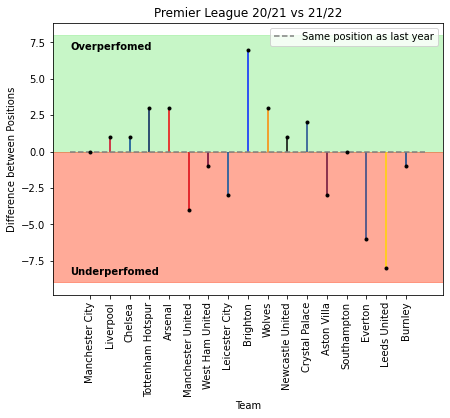

In [33]:
DiffPos21vs22 = "difference in positions between the 20/21 and the 21/22 seasons"

# Create our plot

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
  
plt.vlines(x = np.arange(1, 18), ymin = 0, ymax = table21vs22['DiffPos21vs22'], color = teamColours1)
plt.plot(np.arange(1, 18), table21vs22['DiffPos21vs22'], "k.")
plt.xticks(np.arange(1, 18), table21vs22['Team'], rotation = 90)

# Label our axis and name our plot
plt.ylabel("Difference between Positions")
plt.xlabel("Team")
plt.title("Premier League 20/21 vs 21/22")
  
# Setting the background color of the plot 
ax.axhspan(0, 8, color = '#90EE90', alpha = 0.5) #Green
ax.axhspan(-9, 0, color = '#FF5733', alpha = 0.5) #Red

# Did your team underperfomed, overperfomed, or performed as expected?
ax.text(0, 7, "Overperfomed", color = "black", size = "10", weight = 'bold')
ax.text(0, -8.5, "Underperfomed", color = "black", size = "10", weight = 'bold')
plt.hlines(y = 0, xmin = 0, xmax = 18, color= '#808080' , linestyles = 'dashed' ,label = 'Same position as last year')

# To show our label from the plt.hlines, we can't forget about:
plt.legend()

plt.show()

In [34]:
print(f'Which team overperformed in terms of {DiffPos21vs22}?')
table21vs22[table21vs22['DiffPos21vs22'] > 0][['Pos_2122', 'Team','DiffPos21vs22', 'DiffPts21vs22']].sort_values("DiffPos21vs22", ascending = False)

Which team overperformed in terms of difference in positions between the 20/21 and the 21/22 seasons?


,Pos_2122,Team,DiffPos21vs22,DiffPts21vs22
8,9,Brighton,7,10
3,4,Tottenham Hotspur,3,9
4,5,Arsenal,3,8
9,10,Wolves,3,6
11,12,Crystal Palace,2,4
1,2,Liverpool,1,23
2,3,Chelsea,1,7
10,11,Newcastle United,1,4


In [35]:
print(f'Which team performed equally in terms of {DiffPos21vs22}?')
table21vs22[table21vs22['DiffPos21vs22'] == 0][['Pos_2122', 'Team','DiffPos21vs22', 'DiffPts21vs22']]

Which team performed equally in terms of difference in positions between the 20/21 and the 21/22 seasons?


,Pos_2122,Team,DiffPos21vs22,DiffPts21vs22
0,1,Manchester City,0,7
13,15,Southampton,0,-3


In [36]:
print(f'Which team underperformed in terms of {DiffPos21vs22}?')
table21vs22[table21vs22['DiffPos21vs22'] < 0][['Pos_2122', 'Team','DiffPos21vs22', 'DiffPts21vs22']].sort_values("DiffPos21vs22")

Which team underperformed in terms of difference in positions between the 20/21 and the 21/22 seasons?


,Pos_2122,Team,DiffPos21vs22,DiffPts21vs22
15,17,Leeds United,-8,-21
14,16,Everton,-6,-20
5,6,Manchester United,-4,-16
7,8,Leicester City,-3,-14
12,14,Aston Villa,-3,-10
6,7,West Ham United,-1,-9
16,18,Burnley,-1,-4


### 6.2 Summary

As promised, now we'll show a better table to summarize the comparison between seasons:

In [37]:
table21vs22[['Team', 'DiffW21vs22', 'DiffD21vs22', 'DiffL21vs22', 
             'DiffGF21vs22', 'DiffGA21vs22', 'DiffGD21vs22', 
            'DiffPts21vs22', 'Pos_2021', 'Pos_2122', 'DiffPos21vs22']].sort_values(["DiffPts21vs22","DiffPos21vs22"], ascending = False)

,Team,DiffW21vs22,DiffD21vs22,DiffL21vs22,DiffGF21vs22,DiffGA21vs22,DiffGD21vs22,DiffPts21vs22,Pos_2021,Pos_2122,DiffPos21vs22
1,Liverpool,8,-1,-7,26,-16,42,23,3,2,1
8,Brighton,3,1,-4,2,-2,4,10,16,9,7
3,Tottenham Hotspur,4,-3,-1,1,-5,6,9,7,4,3
4,Arsenal,4,-4,0,6,9,-3,8,8,5,3
2,Chelsea,2,1,-3,18,-3,21,7,4,3,1
0,Manchester City,2,1,-3,16,-6,22,7,1,1,0
9,Wolves,3,-3,0,2,-9,11,6,13,10,3
11,Crystal Palace,-1,7,-6,9,-20,29,4,14,12,2
10,Newcastle United,1,1,-2,-2,0,-2,4,12,11,1
13,Southampton,-3,6,-3,-4,-1,-3,-3,15,15,0


From here, we can take several results:

#### The Positives:
- Even if they were one point short from the championship, Liverpool fairly outperfomed their last season, in every single aspect (in terms of wins, draws, losses, goals scored, goals allowed, points and final position). However, they caught a very strong Man City team that nevertheless improved their perfomance and results from the previous season. 
- As predicted by the expected goals data model, Brighton was one of the biggest surprise of the season, easily surpassing their previous season's results. 
#### The Negatives:
- Talking about underwhelming seasons, there are three teams that stand out: Manchester United, Everton and Leeds United. In the 20/21 season, these teams got very decent to very good results to their standards, but this season they had struggled quite a lot and had underperfomed quite heavily. Still, Man United was able to qualify to European competitions, and Everton and Leeds United were able to save themselves from relegation.
- Leicester City also had an underwhelming season, with fairly less wins, which led them from a 5th place in 20/21 to a 8th place in 21/22.
#### The Interesting Notes:
- Wolves were known as a defensive team with Nuno Espírito Santo, but, with Bruno Lage, a far less defensive coach, they manage to suffer less goals.
- Even though they were still in the middle of the table, Crystal Palace had interesting numbers under Patrick Vieira: as one of the teams that drew more games (15, tied with Brighton), The Eagles were able to score more goals and suffer way less than the previous season. Promising.
- While winning 3 games, Southampton also lost 3 less games. Meanwhile, they drew more this season than last season, which led them to the same position. Consistency.
- In general, the top-5 outperfomed their previous season.

## 7 Extra 21/22 Premier League Analysis  - Comparison between Goals Scored and Goals Allowed w/ a Twist

Inspired by the "Creating Scatter Plots with Club Badges in Python" by FC Python (https://fcpython.com/visualisation/creating-scatter-plots-with-club-logos-in-python), I've decided to a visual analysis of the goals scored and goals allowed by each team through a scatter plot with the club logos.

The teams' badge locations can be added to a new column simply by adding 'images/' before and '.png' after the team name. Let’s save this new column as 'path':

In [38]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

table22["path"] = table22["Team"] + ".png"
table22.head()

<ipython-input-38-c8933973a143>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table22["path"] = table22["Team"] + ".png"


,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts,xG,DiffGF,xGA,DiffGA,DiffGD,xPts,DiffPts,xPos,DiffPos,path
0,1,Manchester City,38,29,6,3,99,26,73,93,93.40,5.60,25.21,0.79,4.81,91.88,1.12,1,0,Manchester City.png
1,2,Liverpool,38,28,8,2,94,26,68,92,93.02,0.98,32.73,-6.73,7.71,86.56,5.44,2,0,Liverpool.png
2,3,Chelsea,38,21,11,6,76,33,43,74,69.30,6.70,35.12,-2.12,8.82,73.38,0.62,3,0,Chelsea.png
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,67.95,1.05,43.70,-3.70,4.75,66.09,4.91,4,0,Tottenham Hotspur.png
4,5,Arsenal,38,22,3,13,61,48,13,69,63.39,-2.39,48.39,-0.39,-2.00,64.76,4.24,5,0,Arsenal.png


Now, we'll work with the 'OffsetImage' that allows us to create a box with an image, to edit the image and  to be added to our plot. Let's create a function, since we'll use this tool often:

In [39]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom = .05, alpha = 1)

Using this function, we prepare the image, but we still need to plot it. We will do so by creating a scatter plot, and plotting the team badges in turn, by iterating through our dataframe (using .iterrows()).

Next, I'll present the code. with some comments regarding important changes or information:

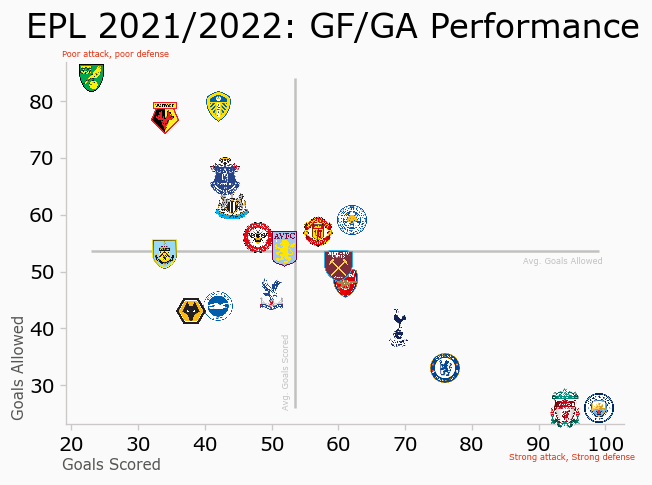

In [40]:
# Set font and background colour
plt.rcParams.update({'font.family':'Verdana'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize = (6, 4), dpi = 120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(table22['GF'], table22['GA'], color = 'white')

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges, iterating through our dataframe
for index, row in table22.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['GF'], row['GA']), frameon = False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(table22['GA'].mean(), table22['GF'].min(), table22['GF'].max(), color = '#c2c1c0')
plt.vlines(table22['GF'].mean(), table22['GA'].min(), table22['GA'].max(), color = '#c2c1c0')

# Text

## Title & comments
fig.text(.07, .93, 'EPL 2021/2022: GF/GA Performance', size = 20)
fig.text(.12, .89, 'Poor attack, poor defense', size = 5, color = '#e63010')
fig.text(.74, .05, 'Strong attack, Strong defense', size = 5, color = '#e63010')

## Avg line explanation
fig.text(.05, .14, 'Goals Allowed', size = 9, color = '#575654', rotation = 90)
fig.text(.12, 0.03, 'Goals Scored', size = 9, color = '#575654')

## Axes titles
fig.text(.76, .46, 'Avg. Goals Allowed', size = 5, color = '#c2c1c0')
fig.text(.425, .16, 'Avg. Goals Scored', size = 5, color = '#c2c1c0', rotation = 90)

## Save plot
plt.savefig('GFvsGA_2122season.png', dpi = 1200, bbox_inches = "tight")

Now that's what I call a cool chart! Now we are able to judge each teams performance according to their goals scored and allowed!

### Summary

Through this plotting technique, we manage to observe the teams performance in terms of attack and defense and easily take some conclusions. For example:
- The Top-2 teams, Liverpool and Man City, show a strong attack and a strong defense.
- 3 of the Bottom-4 teams, Norwich City, Watford and Leeds Utd, show weak attack and defense, which are mirrored in their performances throughout the season. 

## 8. Conclusion

The 21/22 Premier League was one of the most exciting in the history of football. Man City's awarding of the title in the last round with a turnaround in 10 minutes and Leeds Utd's last minute maintenance are examples of this. Plus, football is so unpredictable that even the most advanced football metrics can't be 100% sure of what's going to happen. 

Therefore, this work was to show the 21/22 EPL season as a comparison to perfomance metrics, such as goals expected, and to the previous season, the 20/21 campaign. Thus, to conclude, I will give you my top-3 and bottom-3 of teams that surprised me either positively or negatively, respectively, according to the results obtained:

#### Top-3:
- Man City - this one is easy since they are the champions and outperform everyone, even themselves regarding the metrics and last season.
- Liverpool - the perennial seconds of this football era, they basically outperform everyone and sometimes history, and were this close from the grand prize.
- Brighton - one of the surprises of this edition, where they not only exceed expectations and predictive models but also easily outplayed their previous season.

##### Honorable mentions:
- Wolves, Spurs, Arsenal

#### Bottom-3
- Avoiding to talk about the teams that got relegated, Leeds United was one of the most underwhelming teams this season - The Whites heavily underperfomed their previous season, where they were the surprise, and also fail to meet expecations.
- After not being relegated since 1950-51, the historic Everton was closer to the Championship than ever. This season was one of the most depressing ones for the Toffees fandom, which saw their team underperfom every metric and and their previous season.
- Ending this bottom-3, I can't talk about disappointg teams without mentioning Manchester United. Finishing 2nd in 20/21, even with the presence of Cristiano Ronaldo, the Red Devils finished 6th this season, underperforming in almost every aspect. I say almost because they were better positioned than what xPos predicted.

##### Dishonorable mentions:
- Norwich City, Watford, Burnley, Leicester City

In closing, I would like to thank anyone that took their time to read my first Football Data Analytics work, and I'm hoping that I'll continue to do more projects :)